# overview of campaign deployments: taos0_drifters1

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import cmocean.cm as cm

import numpy as np
import pandas as pd

# cognac data and tools
#import cognac.insitu as iu
import pynsitu as pin

In [2]:
## taos
root_dir = "/Users/aponte/Current_Projects/taos/campagnes/taos0/"

# taos0-drifters1
campaign="taos0_drifters1"
yaml = f"drifters1/{campaign}.yaml"

cp = pin.campaign(os.path.join(root_dir,yaml))

0-4351896
0-4351908
0-4352049
0-4351904
0-4352175
0-4352044
ctd_parceque
ctd_hydrophone
ship_hydrophone
ship_parceque


In [3]:
dr = cp.load('drifters.nc', toframe=True)
dr_ids = [u for u in cp if  "0-435" in u]
colors = {i:c  for i, c in zip(dr_ids, plt.cm.Set2.colors[:len(dr_ids)] )}
# could also use: pin.get_cmap_colors(len(keys))

ship = dict(ship_hydrophone=cp.load('ship_hydrophone', toframe=True),
            ship_parceque=cp.load('ship_parceque', toframe=True),
           )
ctd = dict(ctd_hydrophone=cp.load('ctd_hydrophone', toframe=True),
           ctd_parceque=cp.load('ctd_parceque', toframe=True),
          )

wind = cp.load("arome.nc")
slvl = cp.load('sea_level.nc', toframe=True)

dr.head()

,time,GPS Confidence,GPS Fail Counter,GpsQuality,latitude,longitude,x,y,ux,uy,velocity,deployment
id,,,,,,,,,,,,
0-4351896,2022-05-17 09:40:00,0.0,0.0,3.0,49.339996,-0.245942,486.942445,-277.990901,0.245940,-0.143176,0.284581,d0
0-4351896,2022-05-17 10:00:00,0.0,0.0,3.0,49.338449,-0.242536,734.523943,-450.070782,0.206318,-0.143400,0.251258,d0
0-4351896,2022-05-17 10:20:00,0.0,0.0,3.0,49.337113,-0.239821,931.824526,-598.570348,0.164417,-0.123750,0.205784,d0
0-4351896,2022-05-17 10:40:00,0.0,0.0,3.0,49.335820,-0.238266,1044.900275,-742.352760,0.094230,-0.119819,0.152433,d0
0-4351896,2022-05-17 11:00:00,0.0,0.0,3.0,49.334592,-0.238062,1059.752887,-879.006872,0.012377,-0.113878,0.114549,d0


---
### time line

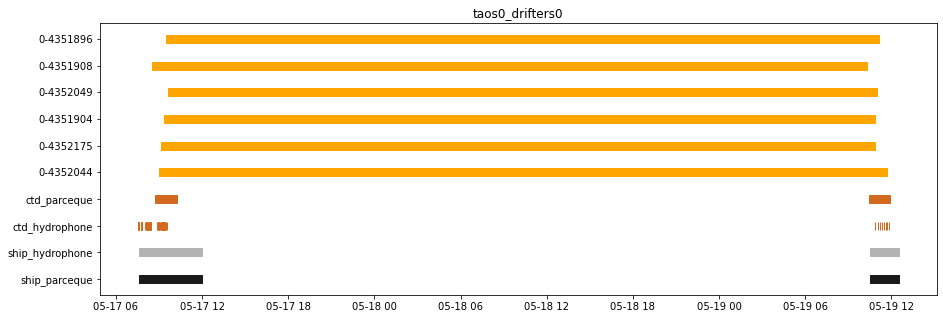

In [4]:
cp.timeline(legend=None)

### Plot overview of both campaigns along with sea level and wind

Text(0, 0.5, '[m/s]')

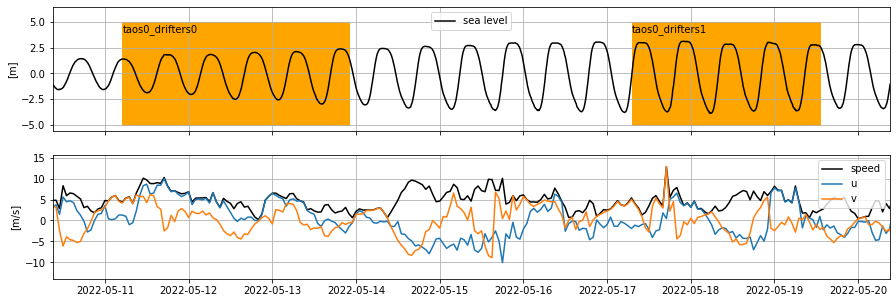

In [5]:
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(2,1, figsize=(15,5))

height=10
y=0
starts, ends = [], []

ax = axes[0]

for cpg in ["taos0_drifters0", "taos0_drifters1"]:
    yaml = cpg.split("_")[-1] + f"/{cpg}.yaml"
    _cp = pin.campaign(os.path.join(root_dir,yaml), verbose=False)
    #print(_cp)

    start = mdates.date2num(_cp.start)
    end = mdates.date2num(_cp.end)
    rect = Rectangle((start, y-height/2.), end-start, height,
                     color="orange")
    ax.add_patch(rect)
    starts.append(start)
    ends.append(end)
    #print(start, end-start)
    ax.text(start, y+height*0.4, cpg)

# sea level
_mtime = slvl.index.map(lambda t: mdates.date2num(t))
_slvl = slvl.sea_level.values
ax.plot(_mtime, _slvl, color="k", label="sea level")
    
delta_time = max(ends) - min(starts)

def _set_axis(ax, xticklabels=True):

    ax.set_xlim(min(starts)-0.1*delta_time, max(ends)+0.1*delta_time)
    locator = mdates.AutoDateLocator(minticks=3)
    formatter = mdates.AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    if not xticklabels:
        ax.set_xticklabels([])
    ax.grid()
    ax.legend()

_set_axis(ax, xticklabels=False,)
ax.set_ylabel("[m]")

### 
ax = axes[1]
    
# wind
_mtime = mdates.date2num(wind.time)
lon, lat = cp["0-4351908"]["d0"].start.lon, cp["0-4351908"]["d0"].start.lat
_w = wind.sel(longitude=lon, latitude=lat, method="nearest")
_uv10 = np.sqrt(_w.u10m**2+_w.v10m**2)
ax.plot(_mtime, _uv10, color="k", label="speed")
ax.plot(_mtime, _w.u10m, label="u")
ax.plot(_mtime, _w.v10m, label="v")

ax.legend()

_set_axis(ax)
ax.set_ylabel("[m/s]")


---

### surface drifters

/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


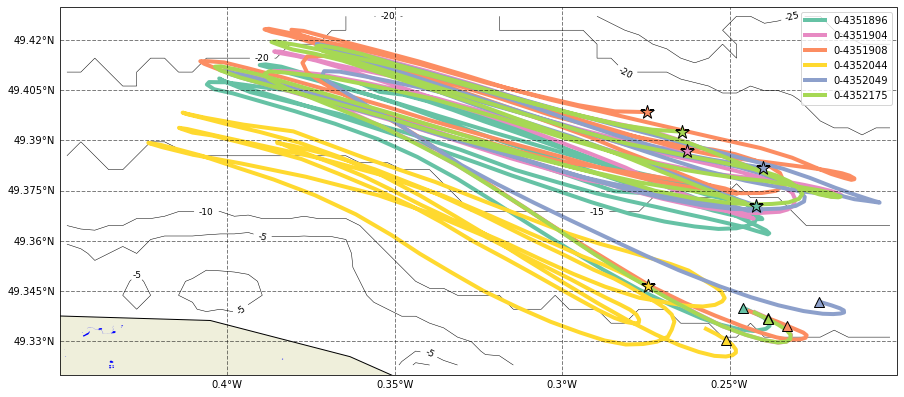

In [4]:
#bounds=[-.5, -.1, 49.25, 49.5]
bounds=[-.45, -.2, 49.32, 49.43] # taos0-drifters1
t_ref = pd.Timestamp("2022-05-17 09:40:00")
#t_ref = pd.Timestamp("2022-05-13 10:40:00")

_df = dr.reset_index().set_index(["id", "deployment"])

fig, ax, crs = cp.plot_map(bounds=bounds, coast="bseine", land=None, rivers="bseine", figsize=(15,10))

keys = _df.groupby(_df.index).groups.keys()
#colors = pin.get_cmap_colors(len(keys))
#colors = plt.cm.Set2.colors[:len(keys)]
_labelled = []

#for k, c in zip(keys, colors):
for k in keys:
    
    c = colors[k[0]] # same color for all drifters
    
    _dfk = _df.groupby(_df.index).get_group(k).reset_index().dropna(axis=1)
    _dfk = _dfk.dropna()
    
    label=None
    if k[0] not in _labelled:
        label=k[0]
        _labelled.append(k[0])
    ax.plot(_dfk.longitude, _dfk.latitude, lw=4, color=c, transform=crs, label=label)
    #label=", ".join(k)
    
    #ax.scatter(_dfk.longitude.iloc[0], _dfk.latitude.iloc[0], color=c, transform=crs,
    if (t_ref >= _dfk.time.values[0]) and (t_ref < _dfk.time.values[-1]):
        _df_tref = _dfk.set_index("time").loc[t_ref]
        ax.scatter(_df_tref.longitude, _df_tref.latitude, color=c, transform=crs,
                edgecolor="k", s=100, zorder=10, marker="^",
               )
    ax.scatter(_dfk.longitude.iloc[-1], _dfk.latitude.iloc[-1], color=c, transform=crs,
            edgecolor="k", s=200, zorder=10, marker="*",
           )

ax.legend()

In [6]:
print(f"0.02 deg latitude = {0.02*111} km")

0.02 deg latitude = 2.22 km


### relative motions

#### Compute relative motions

In [7]:
# convert dataframe to xarray indexed by id and time
_df = dr.reset_index()
_df # filter out 
ds = _df.set_index(["id", "time"]).to_xarray()
ds.geo.set_projection_reference((float(ds.longitude.mean()), float(ds.latitude.mean())))

# recompute projection
ds.geo.project(overwrite=True)
# center of gravity
ds["x_center"] = ds.x.mean("id")
ds["y_center"] = ds.y.mean("id")
# relative position
ds["x_prime"] = ds.x - ds.x_center
ds["y_prime"] = ds.y - ds.y_center
ds["dl_prime"] = np.sqrt(ds["x_prime"]**2 + ds["y_prime"]**2)

# drop values where not all floats are in the water
ds = ds.where( (~np.isnan(ds.x)).all("id"), drop=True )

#### plots

0-4351896 -550.320570377221
0-4351908 408.47351301091476
0-4352049 1104.342383071742
0-4351904 -14.921074396625954
0-4352175 -16.70200625778034
0-4352044 -930.8722450510295


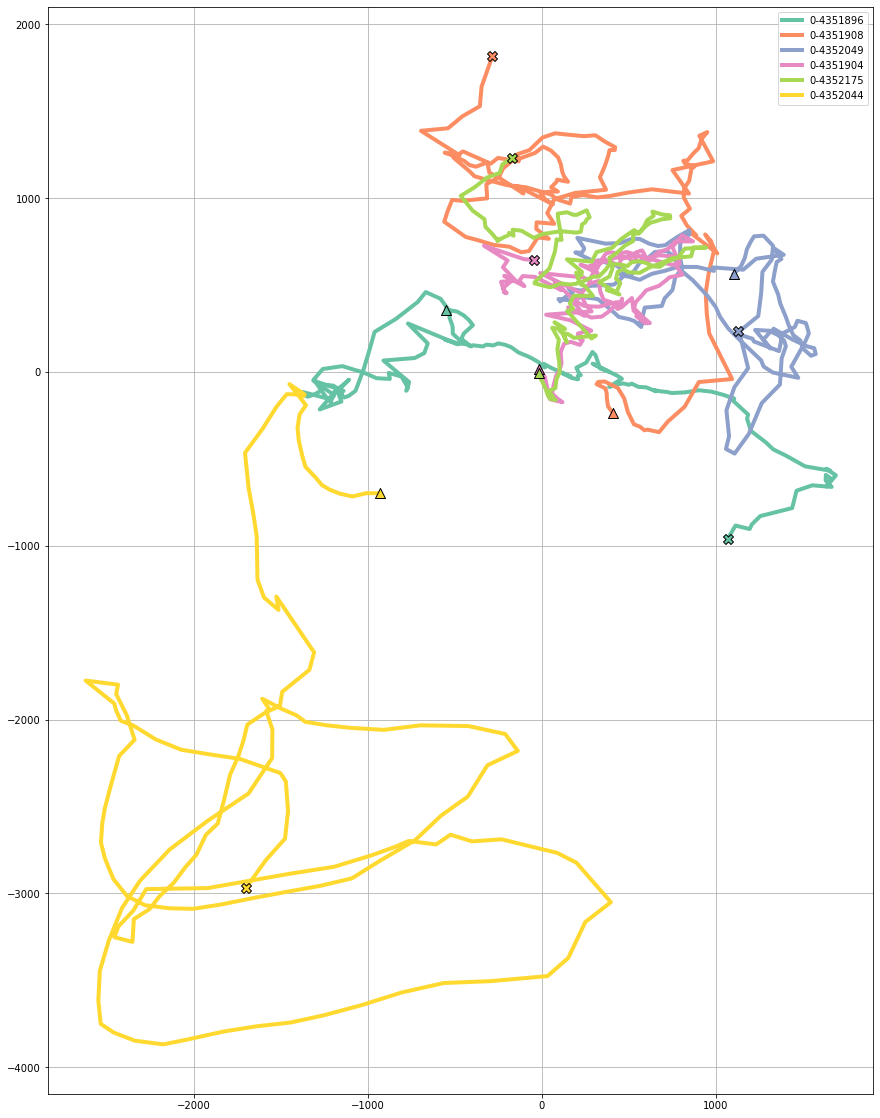

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
#ds.plot.scatter("x_prime", "y_prime", hue="id", s=5)

markers_scale=[1, 1, 1, 1, 1, 1]
lw=4

i=0
#for _id, c in zip(ds.id, colors):
for _id in dr_ids:
    _ds = ds.sel(id=_id).dropna("time")
    c = colors[_id]
    ax.plot(_ds.x_prime, _ds.y_prime, color=c, lw=lw, label=_id)
    print(_id, float(_ds.x_prime.isel(time=0)))
    #_ds_tref = _ds.isel(time=0)
    _ds_tref = _ds.sel(time=t_ref)
    ax.scatter(_ds_tref.x_prime, _ds_tref.y_prime, s=100*markers_scale[i], color=c, marker="^", edgecolors="k", zorder=10)
    ax.scatter(_ds.x_prime.isel(time=-1), _ds.y_prime.isel(time=-1), s=100, color=c, marker="X", edgecolors="k", zorder=10)
    i+=1
ax.set_aspect("equal")
ax.grid()
ax.legend()

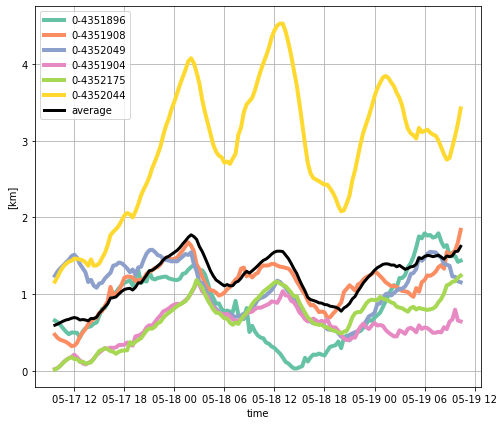

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,7))


i=0
for _id in dr_ids:
    _ds = ds.sel(id=_id).dropna("time")
    c = colors[_id]
    ax.plot(_ds.time, _ds.dl_prime/1e3, color=c, lw=lw, label=_id)
    #print(_id, float(_ds.x_prime.isel(time=0)))
    #ax.scatter(_ds.x_prime.isel(time=0), _ds.y_prime.isel(time=0), s=100*markers_scale[i], color=c, marker="^", edgecolors="k", zorder=10)
    #ax.scatter(_ds.x_prime.isel(time=-1), _ds.y_prime.isel(time=-1), s=100, color=c, marker="X", edgecolors="k", zorder=10)
    i+=1

    
_da = ds["dl_prime"].mean("id") /1e3
ax.plot(_da.time, _da, color="k", lw=3, label="average")

ax.grid()

ax.set_xlabel("time")
ax.set_ylabel("[km]")
ax.legend()

---

## movie


In [4]:

def make_movie(cp, tstart, tend,
               drifters=None,
               ship=None,
               wind=None,
               ctd=None,
               bounds=None,
               istart=None,
              ):
    """ Make a movie
    """
    
    from tqdm import tqdm
    
    t_range = pd.date_range(tstart, tend, freq='10T')
    del_t = pd.Timedelta('1H')

    plt.switch_backend('agg')

    fig_dir = os.path.join(cp.pathp, 'figs/')

    i=-1
    for t in tqdm(t_range):
        i+=1
        
        if istart is not None and i<istart:
            continue

        fig, ax, crs = cp.plot_map(figsize=(10,10), bounds=bounds, 
                                   coast="bseine", land=None, rivers="bseine",
        )

        # ship
        if ship is not None:
            for u, s in ship.items():
                for d, sd in s.items():
                    _s = sd.loc[t-del_t:t]
                    if _s.index.size>0:
                        ax.plot(_s['longitude'], _s['latitude'], lw=2, color='0.5', alpha=.8)
                        
        # wind
        if wind is not None:
            _di = 2
            _ds = (wind.interp(time=t).isel(longitude=slice(0,None,_di),latitude=slice(0,None,_di))
                  )
            q = _ds.plot.quiver(x="longitude", y="latitude", u="u10m", v="v10m", scale=1e2, transform=crs, zorder=-2)
            qk = ax.quiverkey(q, 0.1, 0.9, 10, '10 m/s', transform=crs, color="r",
                              labelpos='W', coordinates='axes', zorder=10)            
                
        # drifters
        if drifters is not None:
            #ids = dr.index.unique()
            ids = [u for u in cp if  "0-435" in u] # prefered as if leads to correct color ordering in legend
            for idx in ids:
                df = dr.loc[idx]
                c = colors[idx]
                for d in df["deployment"].unique():
                    _df = df.loc[df.deployment==d].set_index("time")
                    _df = _df.loc[t-del_t:t]
                    if _df.index.size>0:
                        ax.plot(_df.longitude, _df.latitude, color=c,  #cp[idx]["color"]
                                transform=crs, label=f"{idx}, {d}", lw=2)
                        ax.plot(_df.longitude[-1], _df.latitude[-1], color=c, #cp[idx]["color"]
                                marker="*", markeredgecolor="k", markeredgewidth=.5,
                                transform=crs, label=f"{idx}, {d}", lw=2, markersize=10)

        cp.add_legend(ax, loc=4, colors={idx: colors[idx] for idx in ids})
        ax.set_title(cp.name+'  '+str(t))

        figname = fig_dir+'fig_t%05d' %(i)+'.png'
        _ = fig.savefig(figname, dpi=150, facecolor='w', bbox_inches = 'tight')
        _ = fig.clf()
        
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
### taos0 - drifters0
bounds, istart = None, 0
tstart = '2022-05-17 08:00:00'
#tend = '2022-05-17 09:00:00'
tend = '2022-05-19 13:30:00'
#istart = 315
bounds = [-.45, -.15, 49.25, 49.45]

make_movie(cp, tstart, tend, drifters=dr, ship=ship, wind=wind, bounds=bounds, istart=istart)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 322/322 [32:11<00:00,  6.00s/it]


### ??overview plot??

In [13]:
ds["lon_center"], ds["lat_center"] = ds.geo.compute_lonlat(x=ds.x_center, y=ds.y_center)

In [25]:
# interpolate wind along drifter trajectories
interp = lambda d: (wind[d+"10m"]
                    .interp(time=ds.time)
                    .interp(longitude=ds.lon_center, latitude=ds.lat_center)
                    .drop(["longitude", "latitude"])
                   )
ds["u_wind"] = interp("u")
ds["v_wind"] = interp("v")

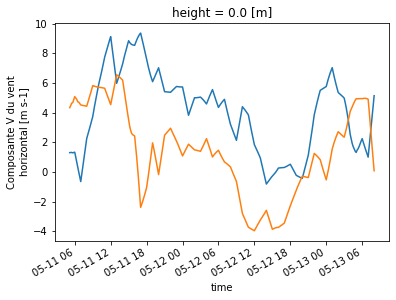

In [28]:
ds.u_wind.plot()
ds.v_wind.plot()

In [29]:
del_t = pd.Timedelta('1H')

In [40]:

def make_movie(cp,
               drifters=None,
               wind=None,
               istart=0,
              ):
    """ Make a movie
    """
    
    from tqdm import tqdm
    
    plt.switch_backend('agg')
    fig_dir = os.path.join(cp.pathp, 'figs/')
    
    del_t = pd.Timedelta('2H')
    
    dl = 5e3
    xlims = (-dl,dl)
    ylims = (-dl,dl)

    i=-1
    for t in tqdm(drifters.time):
        i+=1
        
        if i<istart:
            continue

        fig, ax = plt.subplots(1,1,figsize=(10,10))
        
        ds = drifters.sel(time=slice(t-del_t, t))
        
        # wind
        if wind is not None:
            _di = 2
            _ds = (wind.interp(time=t).isel(longitude=slice(0,None,_di),latitude=slice(0,None,_di))
                  )
            q = _ds.plot.quiver(x="longitude", y="latitude", u="u10m", v="v10m", scale=1e2, transform=crs, zorder=-2)
            qk = ax.quiverkey(q, 0.1, 0.9, 10, '10 m/s', transform=crs, color="r",
                              labelpos='W', coordinates='axes', zorder=10)            
                
        # drifters
        #ids = dr.index.unique()
        ids = [u for u in cp if  "0-435" in u] # prefered as if leads to correct color ordering in legend
        colors = pin.get_cmap_colors(len(ids))
        for idx, c in zip(ids, colors):
            _ds = ds.sel(id=idx)
            if _ds.time.size>0:
                ax.plot(_ds.x_prime, _ds.y_prime, color=c, lw=2)
   
        ax.set_xlim(*xlims)
        ax.set_ylim(*ylims)
        ax.set_aspect("equal")
        ax.grid()
        
        cp.add_legend(ax, loc=4, colors={idx: c for idx, c in zip(ids, colors)})
        ax.set_title(cp.name+'  '+str(t.values))

        figname = fig_dir+'fig_t%05d' %(i)+'.png'
        _ = fig.savefig(figname, dpi=150, facecolor='w', bbox_inches = 'tight')
        _ = fig.clf()
        
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
### taos0 - drifters0
bounds, istart = None, 0
if campaign=="taos0_drifters0":
    tstart = '2022-05-11 05:00:00'
    tend = '2022-05-11 09:00:00'
    #tend = '2022-05-13 10:00:00'
elif campaign=="taos0_drifters1":
    tstart = '2022-05-17 08:00:00'
    #tend = '2022-05-17 09:00:00'
    tend = '2022-05-19 13:30:00'
    #istart = 315

make_movie(cp, ds)

---
## hydrology

In [24]:
case=1
if case==0:
    # drifters1 - day0
    t_bounds = ["2022-05-17 00:00:00", "2022-05-18 00:00:00"]
elif case==1:
    # drifters1 - day1
    t_bounds = ["2022-05-19 00:00:00", "2022-05-20 00:00:00"]
    
in_tbounds = lambda df: not df.reset_index().set_index("time").sort_index() \
                .loc[ t_bounds[0]:t_bounds[1] ].empty

### maps

In [25]:
if case==0:
    # drifters0 - day0
    #bounds = [-.3, -.2, 49.28, 49.4] 
    bounds = [-.27, -.21, 49.29, 49.36]
    figsize = (7,7)
elif case==1:
    # drifters0 - day1
    bounds = [-.3, -0.225, 49.34, 49.40]
    figsize = (7,5)
    
def scatter(v, **kwargs):
    """ produce scatter plot """
    # compute global bounds
    vmin, vmax = _global_bounds(v)
    dkwargs = dict(vmin=vmin, vmax=vmax)
    dkwargs.update(**kwargs)
    
    fig, ax, crs = cp.plot_map(bounds=bounds, 
                               coast="bseine", land=None,
                               #coast="bseine", land=None, rivers="bseine",
                               figsize=figsize,
                              )
    _txt_dl = 0.001
    _txtkwargs = dict(fontsize=12)
    for u, c in ctd.items():
        for d, _df in c.items():
            if not in_tbounds(_df) or v not in _df.columns:
                continue
            if d[0]=="u":
                im = ax.scatter(_df.longitude, _df.latitude, c=_df[v],
                                transform=crs, label=v,
                                **dkwargs
                               )
                ax.text(_df.iloc[0].longitude+_txt_dl, _df.iloc[0].latitude+_txt_dl, 
                        d, transform=crs, **_txtkwargs,
                       )
            elif d[0]=="c":
                _df = _df.bfill().iloc[0]
                im = ax.scatter(_df.longitude, _df.latitude, c=_df[v],
                                transform=crs, label=v,
                                **dkwargs
                               )
                ax.text(_df.longitude+_txt_dl, _df.latitude+_txt_dl, 
                        d, transform=crs, **_txtkwargs,
                       )
    ax.set_title(v)
    cbar = fig.colorbar(im)
    cbar.formatter.set_useOffset(False)
    
def _global_bounds(v):
    _min, _max = [], []
    for u, c in ctd.items():
        for d, _df in c.items():
            if in_tbounds(_df) and  v in _df.columns:
                _min.append(_df[v].min())
                _max.append(_df[v].max())
    return min(_min), max(_max)

/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


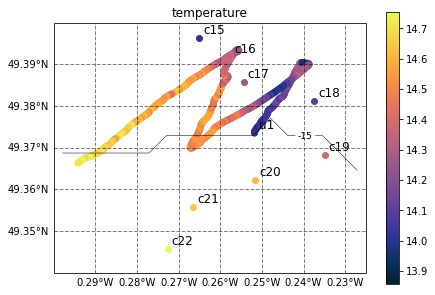

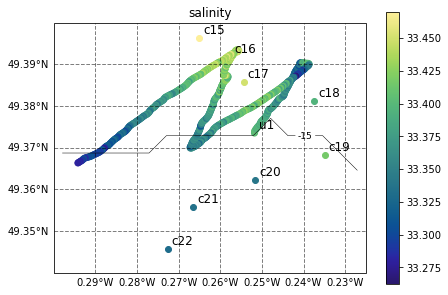

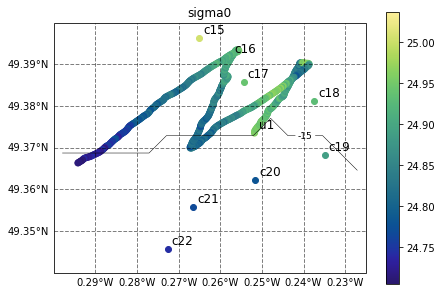

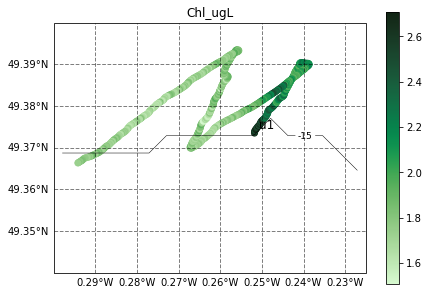

In [26]:
cbar = scatter("temperature", cmap=cm.thermal) # vmin=13.8, vmax=14.1
cbar = scatter("salinity", cmap=cm.haline)
cbar = scatter("sigma0", cmap=cm.haline)
cbar = scatter("Chl_ugL", cmap=cm.algae) # , vmax=5

### T/S plots

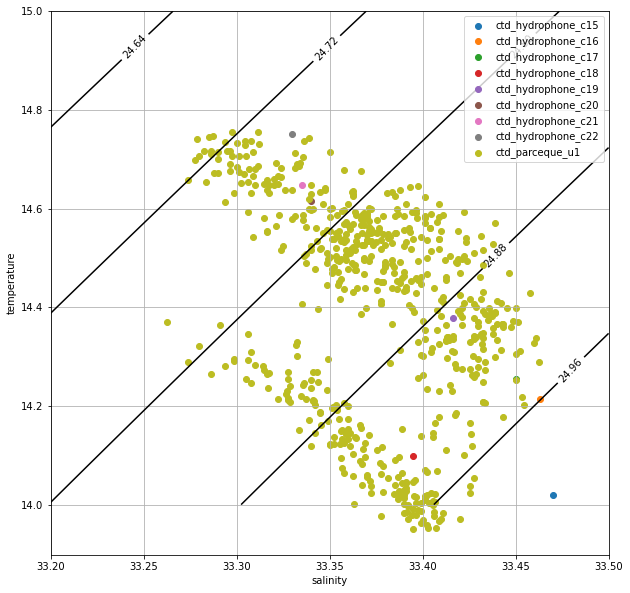

In [27]:
if case==0:
    # taos0_drifters1, day0
    slim, tlim = (32.4, 33.5), (13.5, 15.2) # drifters0 - day 0
elif case==1:
    # taos0_drifters1, day1
    slim, tlim = (33.2, 33.5), (14.0, 15.) # drifters0 - day 1
figsize=(10,10)

D = {}
for u, c in ctd.items():
    for d, _df in c.items():
        if in_tbounds(_df):
            if d[0]=="c":
                _df = _df.bfill().iloc[0]            
            D[u+"_"+d] = _df
    
fig, ax = pin.plot_ts(slim, tlim, figsize=figsize)
colors = pin.get_cmap_colors(len(D))
for d, c in zip(D, colors):
    _df = D[d]
    ax.scatter(_df.salinity, _df.temperature, label=d) #, c=c
ax.legend()

### concatenate data back and show histograms

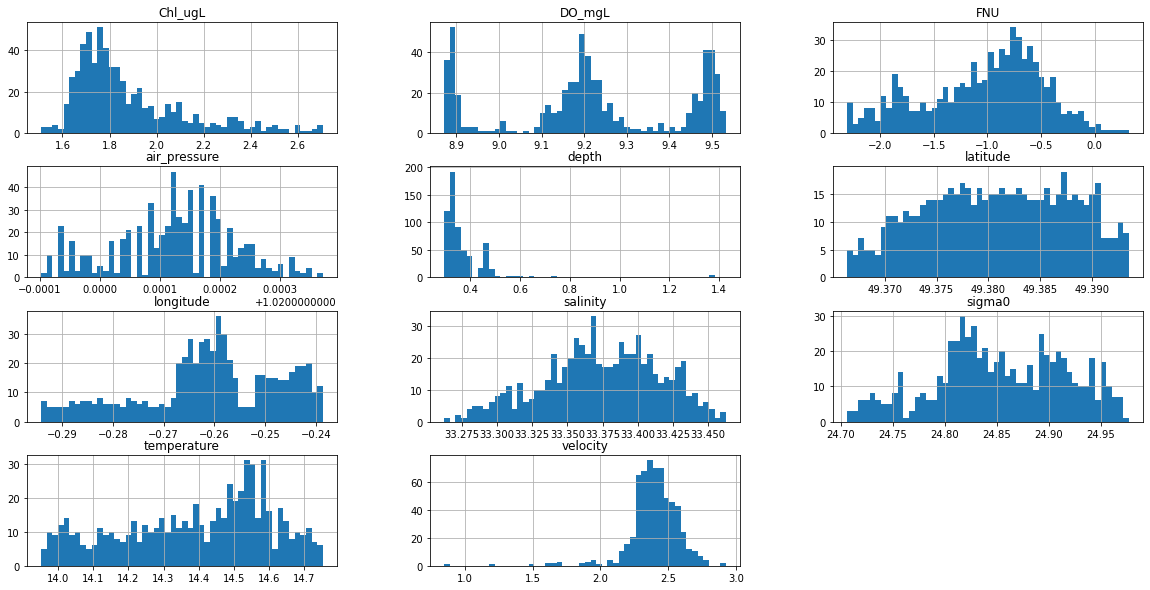

In [29]:
col_drop = ["time", "SA", "CT", "conductivity", "x", "y", "ux", "uy", "pressure", "DO_p", "Chl_RFU"]
df = pd.concat([df for d, df in D.items()], axis=0)
df.drop(columns=col_drop).hist(bins=50, figsize=(20,10));

### CTD cast

In [30]:
figsize=(15,5)

ncasts=0
for u, c in ctd.items():
    for d, _df in c.items():
        if in_tbounds(_df):
            if d[0]=="c":
                ncasts+=1

def plot_profiles(v, offset, units="", ax=None, legend=True):
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)

    colors = pin.get_cmap_colors(ncasts)

    i=0
    for u, c in ctd.items():
        for d, df in c.items():
            if d[0]!="c" or not in_tbounds(df) or v not in df.columns:
                continue
            off = offset*i
            ax.plot(df[v]+off, df.index, color=colors[i], lw=3, label=d) #u+"_"+d
            i+=1

    ax.grid()
    ax.set_title(v)
    ax.set_ylabel("z [m]")
    ax.set_xlabel(units)
    if legend:
        ax.legend(prop={'size': 7}, ncol=2)

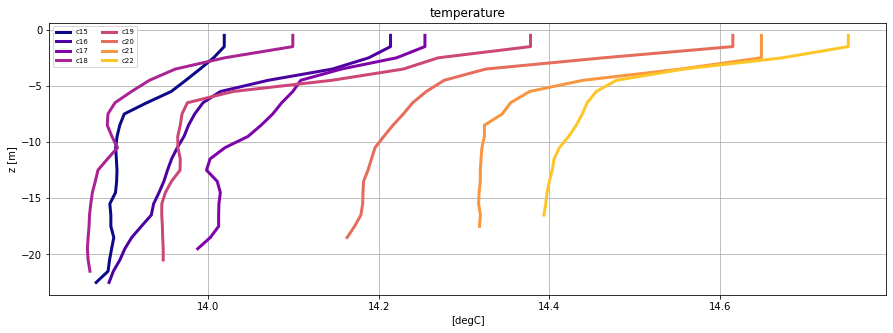

In [31]:
plot_profiles("temperature", 0., units="[degC]")

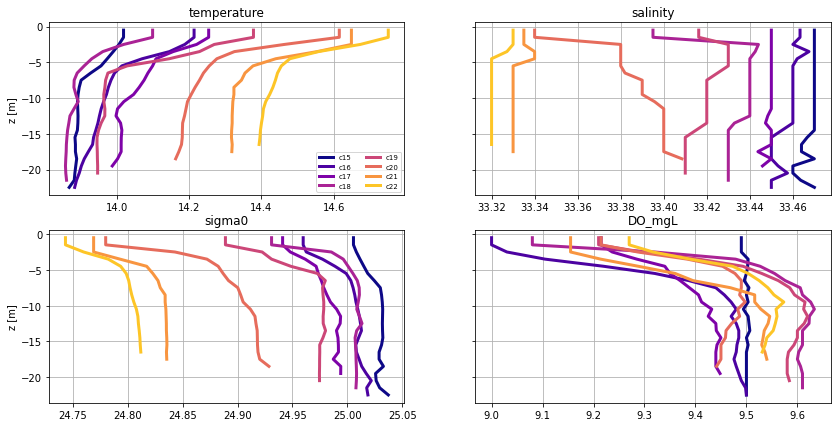

In [32]:
#V = ["temperature", "salinity", "sigma0", "DO_p", "DO_mgL", "FNU", "Chl_RFU",  "Chl_ugL"]
#V = ["temperature", "salinity", "sigma0", "DO_mgL", "FNU",  "Chl_ugL"]
V = ["temperature", "salinity", "sigma0", "DO_mgL"]


ncols = 2
nrows = int(np.ceil(len(V)/ncols))

fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(ncols*7, nrows*3.5),
                         #gridspec_kw=dict(hspace=0.1),
                        )

legend=True
i=0
for v, ax in zip(V, axes.flatten()[:len(V)]):
    plot_profiles(v, 0., units="", ax=ax, legend=legend)
    legend=False
    if i%ncols!=0:
        ax.set_ylabel("")
        ax.set_yticklabels("")
    i+=1

while i<nrows*ncols:
    axes.flatten()[i].axis('off')
    i+=1
    

### Merge all data

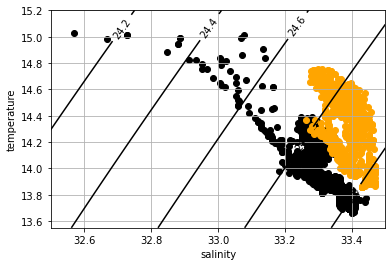

In [23]:
slim, tlim = (32.5, 33.5), (13.55, 15.2)

c0, c1 = "k", "orange"
colors = {**{"u0": c0, "u1": c1}, 
          **{f"c{i}": c0 for i in range(15)},
          **{f"c{i}": c1 for i in range(15,23)},
         }

fig, ax = pin.plot_ts(slim, tlim)
for s in ctd:
    for d, df in ctd[s].items():
        ax.scatter(df.salinity, df.temperature, label=d, color=colors[d])
#ax.legend()

---

### currents, add SMILE

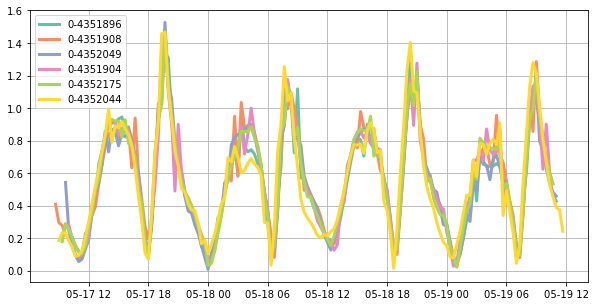

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
#ds.plot.scatter("x_prime", "y_prime", hue="id", s=5)

lw=3

i=0
#for _id, c in zip(ds.id, colors):
for _id in dr_ids:
    _df = dr.loc[_id]
    c = colors[_id]
    ax.plot(_df.time, _df.velocity, color=c, lw=lw, label=_id)
    i+=1
ax.grid()
ax.legend()